# Accuracy

In [1]:
def find_accuracy():
    import pandas as pd
    import numpy as np
    import re
    df=pd.read_csv(r'E:\FYP\P1\Spam.csv')
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(df[['following'	,'followers','is_retweet','actions']])g
    SimpleImputer()
    a=imp.transform(df[['following'	,'followers','is_retweet','actions']])
    ddf= pd.DataFrame(a, columns=['following','followers','isretweet','actions'])
  
    from nltk.corpus import stopwords
    import nltk
    nltk.download('stopwords')
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()

    corpus = []
    l=[]
    for i in range(0, len(df)): 
        phrase = re.sub(r"won't", "will not", df['Tweet'][i])
        phrase = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," hashtag ",phrase)
        phrase = re.sub("0-9", "", phrase)
        phrase = re.sub("_", "", phrase)
        phrase =  re.sub(r'https?:\/\/.*[\r\n]*', ' httpstag ',phrase )
        phrase = re.sub("\d+", "", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa", " ", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa$", '', phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah", ' ', phrase)
        phrase = re.sub(r'\?', '', phrase)
        phrase = phrase.lower()
        phrase = phrase.split()
        phrase = [ps.stem(word) for word in phrase if not word in stopwords.words('english')]
        phrase = ' '.join(phrase)
        corpus.append(phrase)
    
    for w in corpus: 
        l.append(ps.stem(w)) 
    df['Tweet']=l
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['Tweet'])
    b=vectorizer.get_feature_names()
  
    df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

    res = pd.concat([df1, ddf], axis=1)
  
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, y_test = train_test_split(res, df['Type'], test_size=0.3, random_state=42)
    from sklearn.naive_bayes import BernoulliNB
    gnb = BernoulliNB(alpha=1.0)
    y_predi = gnb.fit(X_train, Y_train)
    y_predi=gnb.predict(X_train)
    print("Number of mislabeled points in training data out of a total %d points : %d"
     % (X_train.shape[0], (Y_train != y_predi).sum()))
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print('Accuracy for training data',accuracy_score(Y_train, y_predi))
    print('Confusion matrix of Training Data')
    print(  confusion_matrix(Y_train, y_predi))

    y_pred = gnb.fit(X_train, Y_train)
    y_pred=gnb.predict(X_test)
    print("Number of mislabeled points in testing data out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    from sklearn.metrics import accuracy_score
    print('Accuracy for testing data',accuracy_score(y_test, y_pred))
    
    print('Confusion matrix of Testing data')
    print( confusion_matrix(y_test, y_pred))
    
    from sklearn.metrics import precision_score
    precision1 = precision_score (y_test, y_pred, average = 'binary', pos_label = 'Quality')
    print ("Precision for Quality is: %3f" %precision1)
    precision2 = precision_score (y_test, y_pred, average = 'binary', pos_label = 'Spam')
    print ("Precision for Spam is: %3f" %precision2)
    
    from sklearn.metrics import recall_score
    recall1 = recall_score (y_test, y_pred, average = 'binary', pos_label = 'Quality')
    print ("Recall for Quality is: %3f" %recall1)
    recall2 = recall_score (y_test, y_pred, average = 'binary', pos_label = 'Spam')
    print ("Recall for Spam is: %3f" %recall2)
    
    from sklearn.metrics import f1_score
    score1 = f1_score (y_test, y_pred, average = 'binary', pos_label = 'Quality')
    print ("F_Measure for Quality is: %3f" %score1)
    score2 = f1_score (y_test, y_pred, average = 'binary', pos_label = 'Spam')
    print ("F_Measure for Spam is: %3f" %score2)





# Find Tweet

In [2]:
from sklearn.metrics import accuracy_score
def find_tweet():
    import pandas as pd
    import numpy as np
    import re
    df=pd.read_csv(r'E:\FYP\P1\Spam.csv')
    a=input('enter tweet :')
    b=int(input('enter followers : '))
    c=int(input('enter following : '))
    d=int(input('enter retweets : '))
    f=int(input('enter actions : '))
    j=0
    inp = [{'Tweet': a, 'following':c, 'followers': b, 'is_retweet': d,'actions':f,'Type':j}]
    i = pd.DataFrame(inp)
    one=df[['Tweet','following'	,'followers','is_retweet','actions','Type']]
    two=i
    three=pd.concat([one,two])
    three.reset_index(inplace=True, drop=True)
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(three[['following'	,'followers','is_retweet','actions']])
    SimpleImputer()
    k=imp.transform(three[['following'	,'followers','is_retweet','actions']])
    iddf= pd.DataFrame(k, columns=['following','followers','isretweet','actions'])
    iddf
    from nltk.corpus import stopwords
    import nltk

    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()

    corpus = []
    l=[]
    for i in range(0, len(three) ) :
        phrase = re.sub(r"won't", "will not", three['Tweet'][i])
        phrase = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," hashtag ",phrase)
        phrase = re.sub("0-9", "", phrase)
        phrase = re.sub("_", "", phrase)
        phrase =  re.sub(r'https?:\/\/.*[\r\n]*', ' httpstag ',phrase )
        phrase = re.sub("\d+", "", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa", " ", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa", '', phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah", ' ', phrase)
        phrase=re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah"," ",phrase)
    
        phrase = re.sub(r'\?', '', phrase)
   
        phrase = phrase.lower()
        phrase = phrase.split()
    
        phrase = [ps.stem(word) for word in phrase if not word in stopwords.words('english')]
        phrase = ' '.join(phrase)
        corpus.append(phrase)
    for w in corpus:

        l.append(ps.stem(w))
    three['Tweet']=l
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    Xt = vectorizer.fit_transform(three['Tweet'])
    bt=vectorizer.get_feature_names()

    df_pre = pd.DataFrame(Xt.toarray(), columns=vectorizer.get_feature_names())
    df_pred = pd.concat([df_pre, iddf], axis=1)
    df_pred
    from sklearn.naive_bayes import BernoulliNB
    gnb = BernoulliNB(alpha=1.0)

    y_pred = gnb.fit(df_pred[0:11967],three['Type'][0:11967])
    y_pred=gnb.predict(df_pred[11968:11969])
    return list(y_pred)



In [3]:
find_accuracy()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdurrahman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of mislabeled points in training data out of a total 8377 points : 108
Accuracy for training data 0.9871075564044407
Confusion matrix of Training Data
[[4250   88]
 [  20 4019]]
Number of mislabeled points in testing data out of a total 3591 points : 88
Accuracy for testing data 0.975494291283765
Confusion matrix of Testing data
[[1755   60]
 [  28 1748]]
Precision for Quality is: 0.984296
Precision for Spam is: 0.966814
Recall for Quality is: 0.966942
Recall for Spam is: 0.984234
F_Measure for Quality is: 0.975542
F_Measure for Spam is: 0.975446


Quality    6153
Spam       5815
Name: Type, dtype: int64


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


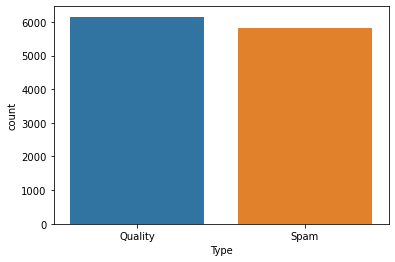

In [4]:
import pandas as pd
df=pd.read_csv(r'E:\FYP\P1\Spam.csv')
print(df['Type'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Type'])
plt.show()

# Hyperparameter Tuning

In [5]:
def find_hyperparameter():
    from sklearn.metrics import accuracy_score
    import pandas as pd
    import numpy as np
    import re
    df=pd.read_csv(r'E:\FYP\P1\Spam.csv')
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(df[['following'	,'followers','is_retweet','actions']])
    SimpleImputer()
    a=imp.transform(df[['following'	,'followers','is_retweet','actions']])
    ddf= pd.DataFrame(a, columns=['following','followers','isretweet','actions'])
  
    from nltk.corpus import stopwords
    import nltk
    nltk.download('stopwords')
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()

    corpus = []
    l=[]
    for i in range(0, len(df)): 
        phrase = re.sub(r"won't", "will not", df['Tweet'][i])
        phrase = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," hashtag ",phrase)
        phrase = re.sub("0-9", "", phrase)
        phrase = re.sub("_", "", phrase)
        phrase =  re.sub(r'https?:\/\/.*[\r\n]*', ' httpstag ',phrase )
        phrase = re.sub("\d+", "", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa", " ", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa$", '', phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah", ' ', phrase)
        phrase = re.sub(r'\?', '', phrase)
        phrase = phrase.lower()
        phrase = phrase.split()
        phrase = [ps.stem(word) for word in phrase if not word in stopwords.words('english')]
        phrase = ' '.join(phrase)
        corpus.append(phrase)
    for w in corpus: 
        l.append(ps.stem(w)) 
    df['Tweet']=l
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['Tweet'])
    b=vectorizer.get_feature_names()
  
    df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

    res = pd.concat([df1, ddf], axis=1)
 
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, y_test = train_test_split(res, df['Type'], test_size=0.5, random_state=42)
    l2=[]
    l4=[]
    from sklearn.naive_bayes import BernoulliNB
    for i in range(1,30):
        gnb = BernoulliNB(alpha=i)
        y_predi = gnb.fit(X_train, Y_train)
        y_predi=gnb.predict(X_train)
      

        gnb.fit(X_train,Y_train)
        c=gnb.predict(X_train)
    
        l2.append(accuracy_score(Y_train,c)*100)
    for j in l2:
        error=100-j
      
        l4.append(error)
    l1=[]
    l3=[]
    for i in range(1,30):
        gnb = BernoulliNB(alpha=i)
      
    
# Train the model using the training sets
        gnb.fit(X_train,Y_train)
        c=gnb.predict(X_test)
    
        l1.append(accuracy_score(y_test,c)*100)
    for k in l1:
        error2=100-k
        print(error2)
        l3.append(error2)
        l5=[]
    for i in range(len(l4)):
        l5.append(i)
      
      
    import matplotlib.pyplot as plt
    plt.plot(l5,l3,'r')
    plt.plot(l5,l4,color='g')
    plt.ylabel('Error')
    plt.xlabel('Hyperparameter')
    plt.grid() # grid on
    plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdurrahman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2.23930481283422
2.2560160427807574
2.339572192513373
2.389705882352942
2.4732620320855716
2.423128342245988
2.523395721925141
2.590240641711233
2.774064171122987
3.158422459893046
3.659759358288767
4.695855614973269
6.049465240641723
7.503342245989302
9.090909090909093
11.39705882352942
14.070855614973269
17.31283422459893
22.075534759358277
26.3870320855615
29.69585561497327
33.18850267379679
35.96256684491979
38.18516042780749
40.22393048128342
42.06216577540107
43.582887700534755
44.71925133689839
45.838903743315505


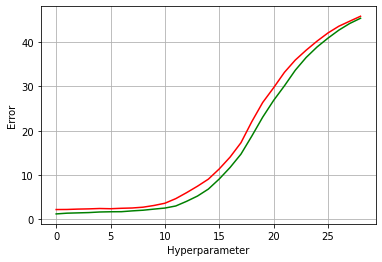

In [6]:
find_hyperparameter()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdurrahman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


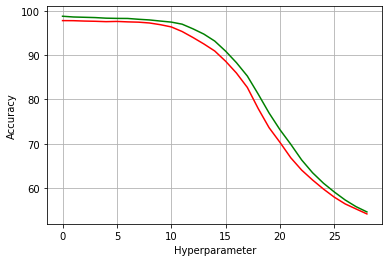

In [7]:
def find_hyperparameteraccuracy():
    from sklearn.metrics import accuracy_score
    import pandas as pd
    import numpy as np
    import re
    df=pd.read_csv(r'E:\FYP\P1\Spam.csv')
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(df[['following'	,'followers','is_retweet','actions']])
    SimpleImputer()
    a=imp.transform(df[['following'	,'followers','is_retweet','actions']])
    ddf= pd.DataFrame(a, columns=['following','followers','isretweet','actions'])
    from nltk.corpus import stopwords
    import nltk
    nltk.download('stopwords')
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()

    corpus = []
    l=[]
    for i in range(0, len(df)): 
        phrase = re.sub(r"won't", "will not", df['Tweet'][i])
        phrase = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," hashtag ",phrase)
        phrase = re.sub("0-9", "", phrase)
        phrase = re.sub("_", "", phrase)
        phrase =  re.sub(r'https?:\/\/.*[\r\n]*', ' httpstag ',phrase )
        phrase = re.sub("\d+", "", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa", " ", phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa$", '', phrase)
        phrase = re.sub(r"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah", ' ', phrase)
        phrase = re.sub(r'\?', '', phrase)
        phrase = phrase.lower()
        phrase = phrase.split()
        phrase = [ps.stem(word) for word in phrase if not word in stopwords.words('english')]
        phrase = ' '.join(phrase)
        corpus.append(phrase)
    for w in corpus: 
        l.append(ps.stem(w)) 
    df['Tweet']=l
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['Tweet'])
    b=vectorizer.get_feature_names()
  
    df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

    res = pd.concat([df1, ddf], axis=1)
 
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, y_test = train_test_split(res, df['Type'], test_size=0.5, random_state=42)
    l2=[]
    l1=[]
    from sklearn.naive_bayes import BernoulliNB
    for i in range(1,30):
        gnb = BernoulliNB(alpha=i)
        y_predi = gnb.fit(X_train, Y_train)
        y_predi=gnb.predict(X_train)
      



        gnb.fit(X_train,Y_train)
        c=gnb.predict(X_train)
    
        l2.append(accuracy_score(Y_train,c)*100)
  
  
    for i in range(1,30):
        gnb = BernoulliNB(alpha=i)
      
    
# Train the model using the training sets
        gnb.fit(X_train,Y_train)
        c=gnb.predict(X_test)
        l1.append(accuracy_score(y_test,c)*100)
    
    l5=[]
    for i in range(len(l2)):
        l5.append(i)
      
      
    import matplotlib.pyplot as plt
    plt.plot(l5,l1,'r')
    plt.plot(l5,l2,color='g')
    plt.ylabel('Accuracy')
    plt.xlabel('Hyperparameter')
    plt.grid() # grid on
    plt.show()

find_hyperparameteraccuracy()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdurrahman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


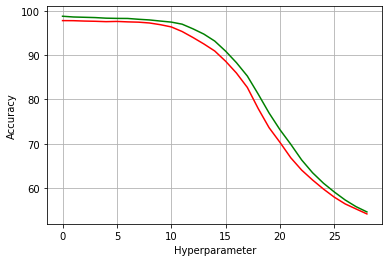

In [8]:
find_hyperparameteraccuracy()

In [9]:
find_tweet()

enter tweet :
  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }Imran Khan is not the prime minister of pakistan.#imransays
enter followers : 32
enter following : 30
enter retweets : 5
enter actions : 10


['Spam']